2025-04-03 16:35:30,840 - matplotlib - DEBUG - __init__ - wrapper - 342 - matplotlib data path: /home/robby/miniconda3/envs/myocr/lib/python3.11/site-packages/matplotlib/mpl-data
2025-04-03 16:35:30,844 - matplotlib - DEBUG - __init__ - wrapper - 342 - CONFIGDIR=/home/robby/.config/matplotlib
2025-04-03 16:35:30,848 - matplotlib - DEBUG - __init__ - <module> - 1557 - interactive is False
2025-04-03 16:35:30,848 - matplotlib - DEBUG - __init__ - <module> - 1558 - platform is linux
2025-04-03 16:35:30,868 - matplotlib - DEBUG - __init__ - wrapper - 342 - CACHEDIR=/home/robby/.cache/matplotlib
2025-04-03 16:35:30,869 - matplotlib.font_manager - DEBUG - font_manager - _load_fontmanager - 1635 - Using fontManager instance from /home/robby/.cache/matplotlib/fontlist-v390.json
2025-04-03 16:35:31,040 - myocr.modeling.model - INFO - model - load - 126 - Onnx model /home/robby/.MyOCR/models/dbnet++.onnx loaded to cuda:0,
                    input output info: {'inputs': {'x': {'shape': ['p2o.Dy

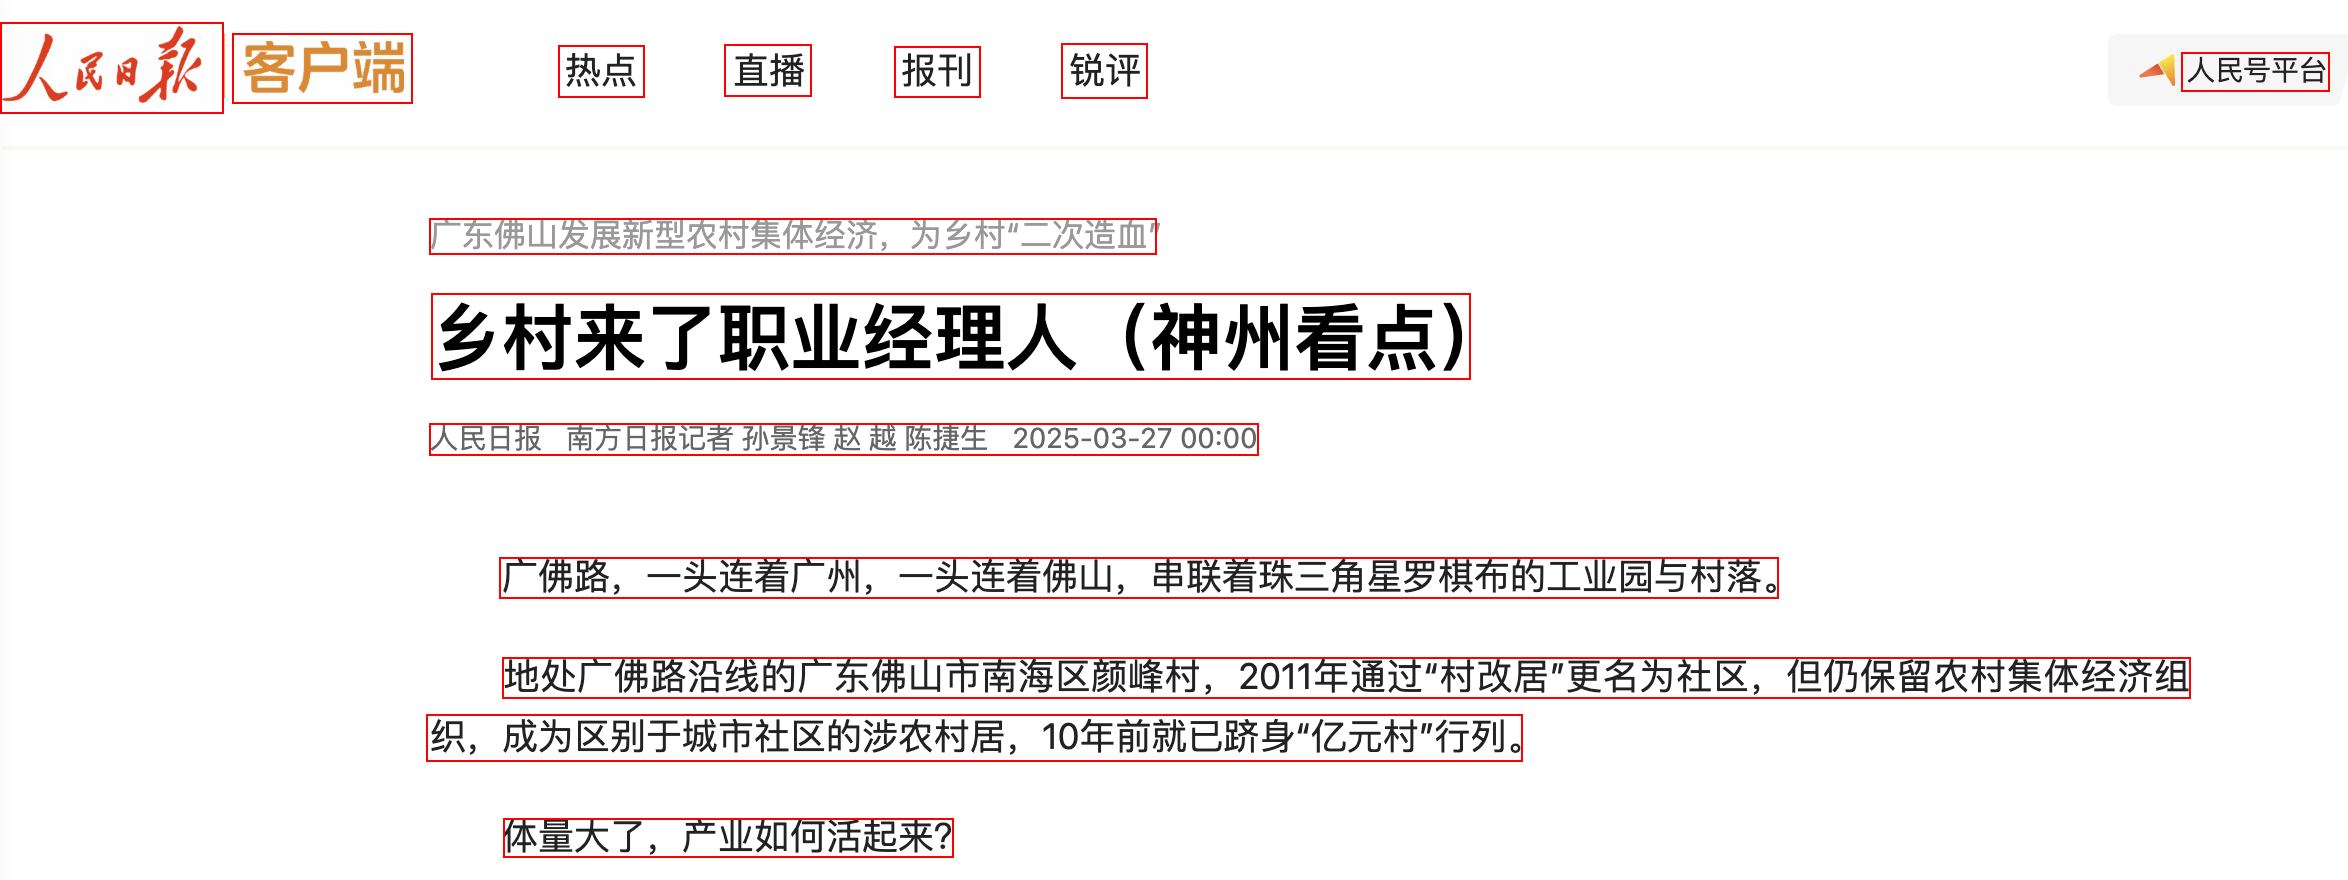

In [1]:
import time
import torch
from PIL import Image,ImageDraw
from myocr.config import MODEL_PATH
from myocr.modeling.model import ModelZoo
from myocr.predictors.text_detection_predictor import TextDetectionParamConverter
from myocr.predictors.text_recognition_predictor import TextRecognitionParamConverter

orig_image = Image.open("../../tests/images/test.png").convert("RGB")

dec = ModelZoo.load_model("onnx", MODEL_PATH+"dbnet++.onnx", "cuda:0" if torch.cuda.is_available() else "cpu")
model = ModelZoo.load_model("onnx", MODEL_PATH+"crnn_lite_lstm.onnx", "cuda:0" if torch.cuda.is_available() else "cpu")

start_time = time.time()
dec_predictor = dec.predictor(TextDetectionParamConverter(dec.device))
detected = dec_predictor.predict(orig_image)
if not detected:
    print("Nothing detected")
else:
    cvt = TextRecognitionParamConverter()
    p = model.predictor(cvt)
    rec = p.predict(detected)
    ent_time = time.time()
    print(f"predict cost: {ent_time-start_time} \nresult:{rec}")
    draw = ImageDraw.Draw(orig_image)
    for box in detected.bounding_boxes: # type: ignore
        draw.polygon(
            [(box.left, box.bottom), (box.left, box.top), (box.right, box.top), (box.right, box.bottom)],
            outline="red",
            width=2,
        )

    display(orig_image)
    if cvt.retain_croped_imgs:
        for img in cvt.croped_imgs:
            display(img)


